# [E-03]StickerApp

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

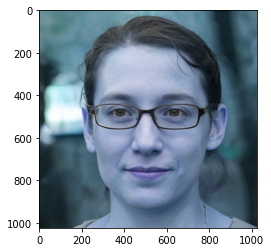

In [13]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_2.png'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()     
plt.imshow(img_bgr)
plt.show()

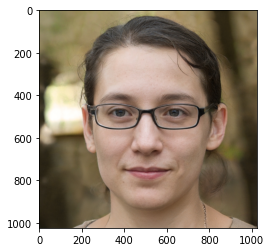

In [14]:
# RGB 이미지로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# face detector 로 얼굴 찾기
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(233, 357) (788, 911)]]


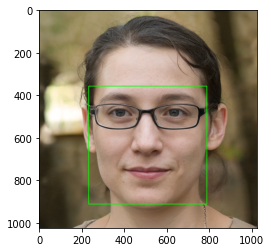

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 찾은 얼굴영역 좌표
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
#저장한 landmark 모델 불러오기

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


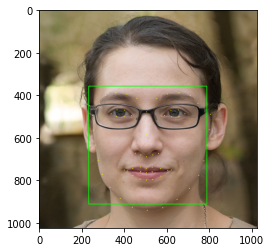

In [8]:
#랜드마크를 영상에 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)   # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()

In [9]:
# 얼굴 이미지에서 코의 중심점 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])   # 코의 index는 30 입니다
    x = landmark[30][0]   
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(502, 637)
(x,y) : (502,637)
(w,h) : (556,556)


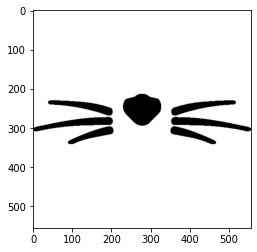

(556, 556, 3)


In [10]:
# 고양이 수염 스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
print (img_sticker.shape)

In [11]:
# top, left 위치 설정
refined_x = x - w//2   # left
refined_y = y - h//2   # top
print('(x,y) : (%d,%d)'%(refined_x,refined_y))

(x,y) : (224,359)


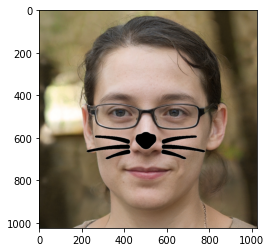

In [12]:
# 스티커 적용하기
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

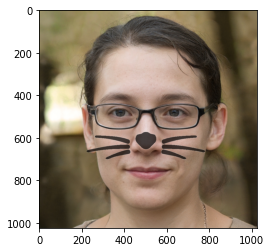

In [19]:
# 스티커 투명도 조절
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 전신사진 & 다인원

In [16]:
def test_sticker(img_path):
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/' + img_path
    img_bgr = cv2.imread(my_image_path)    
    img_show = img_bgr.copy()      
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()
    
    dlib_rects = detector_hog(img_rgb, 1)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) 

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    refined_x = x - w//2  
    refined_y = y - h//2  

    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()
        

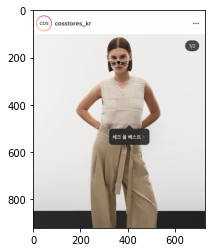

In [17]:
test_sticker('image_3.png')

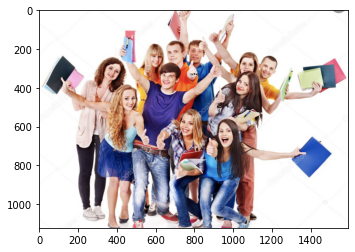

In [18]:
test_sticker('image_5.png')

# 회고

세 번째 Exploration 과제인데 아직도 잘 모르겠다.  
이번에도 그냥 열심히 코드를 따라서 쳤다.  
투명도 설정은 구글에 어떤 분이 한 것을 참고해서 넣으니 잘 실행되었다.  
cv2.addWeighted에서 숫자 부분을 조절하니 스티커 이미지와 바탕 이미지의 밝기가 조절되었다.  
두 숫자의 균형이 맞지 않으면 어느 한쪽이 지나치게 밝아진다.  
전신으로 나온 사진은 얼굴 부분이 작아서 얼굴인식이 잘 안되지 않을까 생각했는데 생각보다 인식이 잘 됐다.  
여러 명 있는 사진은 얼굴인식이 안되었는지 엉뚱한 곳에 스티커가 생성되었다.  
아마 얼굴인식이 한 사람만 되는 것이 아닐까 추측해 본다.  
그리고 이 예시를 통해 스티커 앱을 만들 때에도 정확도가 중요하다고 생각이 들었다.  
나의 예시처럼 엄지에 고양이 수염 스티커가 붙으면 안 되니까..  
스티커 이미지 각도를 조절하는 예시도 만들어볼까 했는데 이미지 벡터까지 구해야 해서 포기했다.  
다른 사람이 완벽하게 만들어 놓은 예시를 찾게 된다면 공부해 봐야겠다.  

스티커 투명도 조절 참고 블로그 : https://computistics.tistory.com/36